# SUPERVISED CLASSIFICATION OF ARTICLES

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

## 1. Load and clean data

In [3]:
meta = pd.read_excel("../articoli_testo_new_9.xlsx", encoding="utf8", 
                     error_bad_lines=False, dtype={'Data': datetime})
meta = meta.replace(np.nan, '', regex=True)

In [4]:
article_id = meta['ID']
print ("Numero totale di articoli: %d" % len(article_id))

Numero totale di articoli: 814


In [5]:
meta['Data'] = pd.to_datetime(meta['Data'])

In [6]:
trend1 = []
for i in meta['Trend 1']:
    trend1.append(i)

#trend2 = []
#for i in meta['Trend 2']:
#    trend2.append(i)
#    
#trend3 = []
#for i in meta['Trend 3']:
#    trend3.append(i)

In [7]:
Trend = []
for i in range(len(article_id)):
    l = []
    if len(trend1[i]): l.append(trend1[i])
    #if len(trend2[i]): l.append(trend2[i])
    #if len(trend3[i]): l.append(trend3[i])
        
    #Trend.append(list(l))
    Trend.append(', '.join(map(str, list(l)))) 
    
Trend[0]

'Circular Economy Sustainability and Zero Impact Economy'

In [8]:
# Create Tech Dataframe
trend = pd.DataFrame({'ID': article_id, 'Trend': Trend})
trend.head()

,ID,Trend
0,7f9f2aea41caf2f034af9b5423abb95f,Circular Economy Sustainability and Zero Impact Economy
1,c812e0a3418d624ae60df3ec9e19d184,Robotics and Human/Machine Hybridization
2,61268fb46585bba4ac828cc277b69ecb,High Tech Farming
3,d3e4f8a85f1c96d9839de642e856645f,Digital Politics and Smart Citizenship
4,879f738c66345cf45682fc3e2117e743,Smart & Digital Water


In [51]:
articoli = meta[['ID','Titolo','Abstract', 'Data', 'Testo']]
articoli = pd.merge(articoli, trend, on = 'ID')

In [52]:
# remove samples with no tags
articoli['Trend'] = articoli['Trend'].apply(lambda y: '' if len(y)==0 else y)
articoli = articoli[~(articoli['Trend'].str.len() == 0)]
articoli = articoli[~(articoli['Testo'].str.len() == 0)]
articoli = articoli.dropna(subset=['Data'])

In [53]:
len(articoli)
print ("Numero totale di articoli: %d" % len(articoli))

Numero totale di articoli: 717


In [54]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text)
    text = re.sub(r'[?|!|\'|"|#]',r'',text)
    text = re.sub(r'[.|,|)|(|\|/]',r' ',text)
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    
    text = text.replace("\n"," ")
    
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [55]:
def extract_date(df,column):
    df["Anno"] = df[column].apply(lambda x: x.year)
    df["Mese"] = df[column].apply(lambda x: x.month)
    df["Day"] = df[column].apply(lambda x: x.day)

In [56]:
articoli['Titolo'] = articoli['Titolo'].apply(lambda x: clean_text(x))
articoli['Abstract'] = articoli['Abstract'].apply(lambda x: clean_text(x))
articoli['Testo'] = articoli['Testo'].apply(lambda x: clean_text(x))
extract_date(articoli, "Data")

In [57]:
print ("Numero totale di articoli: %d" % len(articoli))

Numero totale di articoli: 717


In [58]:
import datetime

def extract_week_number(df, column):
    df["Week"] = df[column].apply(lambda x: datetime.date(int(x.year), int(x.month), int(x.day)).strftime("%V"))
    #datetime.date(articoli['Data'][0].year, articoli['Data'][0].month , articoli['Data'][0].day).strftime("%V")
    
extract_week_number(articoli, "Data")

In [59]:
articoli.head()

,ID,Titolo,Abstract,Data,Testo,Trend,Anno,Mese,Day,Week
0,7f9f2aea41caf2f034af9b5423abb95f,investor group no european oil and gas major has a credible net zero plan,,2020-05-14,none of europes leading oil and gas majors has released a credible plan for achieving netzero emissions by the middle of the century despite recent declarations from bp shell total and others that they are committed to achieveing netzero status by that is the conclusion of a new analysis from th...,Circular Economy Sustainability and Zero Impact Economy,2020,5,14,20
1,c812e0a3418d624ae60df3ec9e19d184,pandemic drone could spot those who are infected,,2020-04-03,spotted in the current climate one of the major problems in controlling a pandemic such as covid is not knowing who is infected and how widespread the disease is in your area the university of south australia and canada based drone technology specialist draganfly inc have teamed up to develop a ...,Robotics and Human/Machine Hybridization,2020,4,3,14
2,61268fb46585bba4ac828cc277b69ecb,europe s green deal eu commission president ursula von der leyen announces europe s man on the moon moment videos,,2019-12-15,agriculture published on december th by cynthia shahan europe s green deal eu commission president ursula von der leyen announces europe s man on the moon moment videos twitter linkedin facebook december th by cynthia shahan,High Tech Farming,2019,12,15,50
3,d3e4f8a85f1c96d9839de642e856645f,green swans and the exponential decade a conversation with john elkington,,2020-05-19,optimism and excitement despite the ongoing global covid pandemic those two words were at the center of last weeks greenbiz webcast which featured an interview between greenbiz executive editor joel makower and john elkington who in addition to being executive chairman and cofounder of volans ve...,Digital Politics and Smart Citizenship,2020,5,19,21
4,879f738c66345cf45682fc3e2117e743,sustainable nation film showcases israeli water tech,,2020-04-26,sustainable nation a documentary that follows three israeli innovators applying israeli water technology solutions to help waterstressed countries will premier live online on april at pm edt am pst pm idt it will be available on youtube until may and then on amazon prime by the summer the hourlo...,Smart & Digital Water,2020,4,26,17


In [60]:
print ("Numero totale di articoli: %d" % len(articoli))

Numero totale di articoli: 717


## 2. Remove stopwords from data

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edoardo.esposito\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
stop_words = nltk.corpus.stopwords.words('english')
my_stopwords = ['also','said', 'one', 'may', 'polls', 'sorry', 'like', 'use', 'many', 'make', 'could', 
                'even', 'says', 'new', 'us', 'would', 'time', 'companies', 'moment', 'way', 'using', 'two',
               'across', 'well', 'world', 'first', 'system', 'million', 'systems', 'including', 'example', 'year', 
                'based', 'googletagcmdpushfunction']
stop_words.extend(my_stopwords)

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

articoli['Abstract'] = articoli['Abstract'].apply(lambda x: remove_stopwords(x))
articoli['Titolo'] = articoli['Titolo'].apply(lambda x: remove_stopwords(x))
articoli['Testo'] = articoli['Testo'].apply(lambda x: remove_stopwords(x))

In [63]:
articoli['Txt'] = articoli['Titolo'] + articoli['Testo'] + articoli['Abstract']
del(articoli['Abstract'])
#del(articoli['Titolo'])
del(articoli['Testo'])

In [64]:
articoli.head()

,ID,Titolo,Data,Trend,Anno,Mese,Day,Week,Txt
0,7f9f2aea41caf2f034af9b5423abb95f,investor group european oil gas major credible net zero plan,2020-05-14,Circular Economy Sustainability and Zero Impact Economy,2020,5,14,20,investor group european oil gas major credible net zero plannone europes leading oil gas majors released credible plan achieving netzero emissions middle century despite recent declarations bp shell total others committed achieveing netzero status conclusion analysis influential transition pathw...
1,c812e0a3418d624ae60df3ec9e19d184,pandemic drone spot infected,2020-04-03,Robotics and Human/Machine Hybridization,2020,4,3,14,pandemic drone spot infectedspotted current climate major problems controlling pandemic covid knowing infected widespread disease area university south australia canada drone technology specialist draganfly inc teamed develop pandemic drone technology uses special sensors computer vision detect ...
2,61268fb46585bba4ac828cc277b69ecb,europe green deal eu commission president ursula von der leyen announces europe man moon videos,2019-12-15,High Tech Farming,2019,12,15,50,europe green deal eu commission president ursula von der leyen announces europe man moon videosagriculture published december th cynthia shahan europe green deal eu commission president ursula von der leyen announces europe man moon videos twitter linkedin facebook december th cynthia shahan
3,d3e4f8a85f1c96d9839de642e856645f,green swans exponential decade conversation john elkington,2020-05-19,Digital Politics and Smart Citizenship,2020,5,19,21,green swans exponential decade conversation john elkingtonoptimism excitement despite ongoing global covid pandemic words center last weeks greenbiz webcast featured interview greenbiz executive editor joel makower john elkington addition executive chairman cofounder volans ventures authority co...
4,879f738c66345cf45682fc3e2117e743,sustainable nation film showcases israeli water tech,2020-04-26,Smart & Digital Water,2020,4,26,17,sustainable nation film showcases israeli water techsustainable nation documentary follows three israeli innovators applying israeli water technology solutions help waterstressed countries premier live online april pm edt pst pm idt available youtube amazon prime summer hourlong documentary imag...


In [65]:
print ("Numero totale di articoli: %d" % len(articoli))

Numero totale di articoli: 717


## 3. Exploratory Analysis

Numero totale di trend: 34


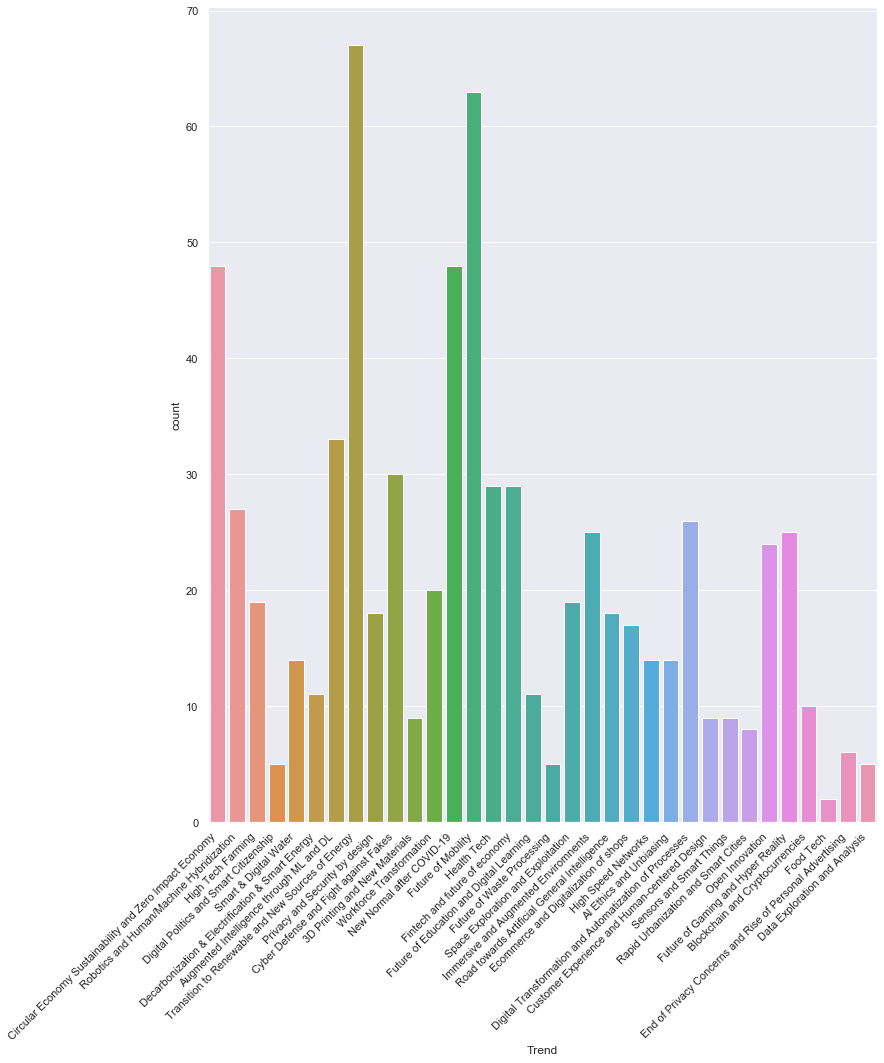

In [66]:
print ("Numero totale di trend: %d" % len(articoli['Trend'].unique()))

plt.figure(figsize=(12,15))
ax=sns.countplot(articoli["Trend"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Figure size 936x576 with 0 Axes>

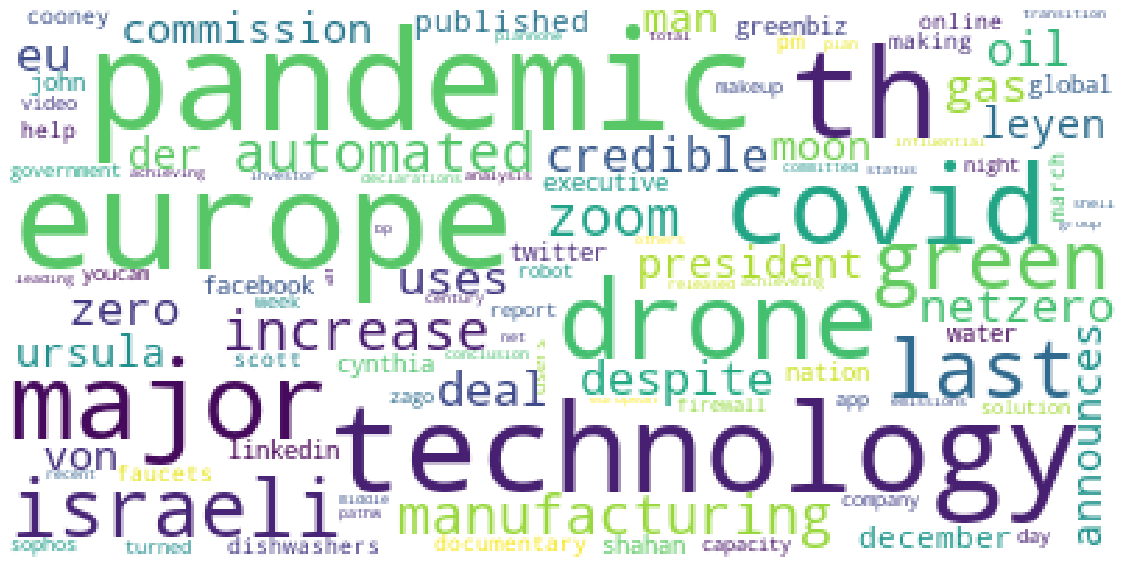

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(articoli['Txt']))

fig = plt.figure(1)
plt.figure(figsize=(20,20)) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
import re

corpus = articoli['Txt']
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [69]:
# TODO - List all and remove stopwords
list(cv.vocabulary_.keys())[:5]

['investor', 'group', 'european', 'oil', 'gas']

In [70]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [71]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

[Text(0, 0, 'data'),
 Text(0, 0, 'people'),
 Text(0, 0, 'company'),
 Text(0, 0, 'energy'),
 Text(0, 0, 'technology'),
 Text(0, 0, 'covid'),
 Text(0, 0, 'work'),
 Text(0, 0, 'business'),
 Text(0, 0, 'need'),
 Text(0, 0, 'ai'),
 Text(0, 0, 'digital'),
 Text(0, 0, 'help'),
 Text(0, 0, 'customers'),
 Text(0, 0, 'water'),
 Text(0, 0, 'industry'),
 Text(0, 0, 'years'),
 Text(0, 0, 'percent'),
 Text(0, 0, 'global'),
 Text(0, 0, 'solar'),
 Text(0, 0, 'pandemic')]

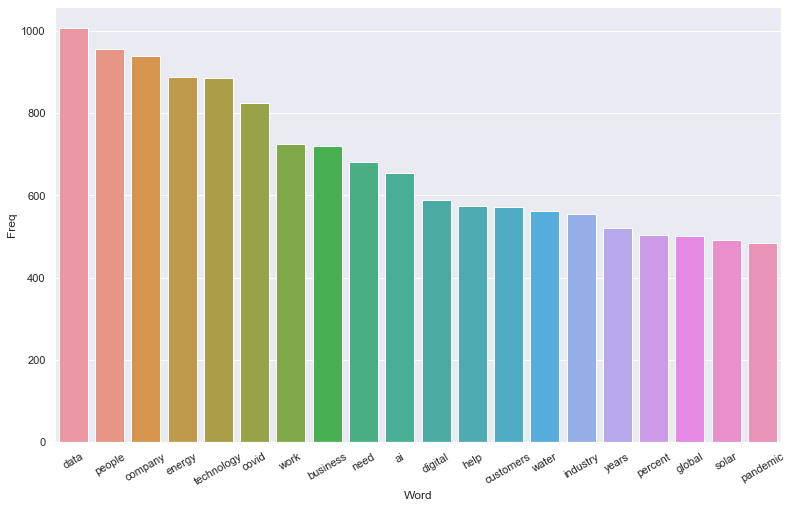

In [72]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'renewable energy'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'climate change'),
 Text(0, 0, 'united states'),
 Text(0, 0, 'supply chain'),
 Text(0, 0, 'twitter linkedin'),
 Text(0, 0, 'linkedin facebook'),
 Text(0, 0, 'open innovation'),
 Text(0, 0, 'artificial intelligence'),
 Text(0, 0, 'covid pandemic'),
 Text(0, 0, 'supply chains'),
 Text(0, 0, 'clean energy'),
 Text(0, 0, 'long term'),
 Text(0, 0, 'tesla model'),
 Text(0, 0, 'decision making'),
 Text(0, 0, 'vice president'),
 Text(0, 0, 'covid crisis'),
 Text(0, 0, 'public health'),
 Text(0, 0, 'social distancing'),
 Text(0, 0, 'deep learning')]

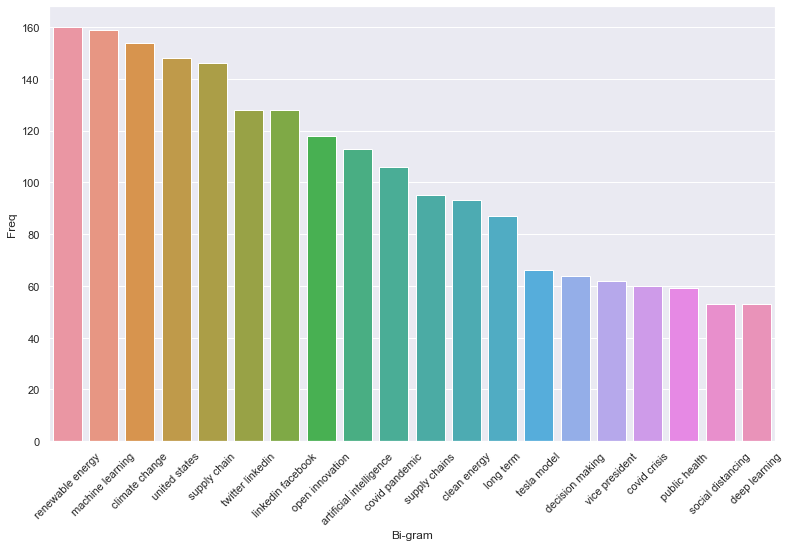

In [73]:
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h = sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

## 5. Extract keywords for each row

In [74]:
#https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# get feature names
feature_names=cv.get_feature_names()

In [75]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [76]:
def extract_keys_for_row(doc, n):  
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    
    #extract only the top n
    keywords=extract_topn_from_vector(feature_names,sorted_items, n)
    
    kw = []
    for k in keywords:
        kw.append(k)
        
    return ",".join(kw)
        
extract_keys_for_row(articoli['Txt'][1], 25)

'drone,detect,respiratory,infected,heart,pandemic,innovations,computer,rate,technology,teamed,airports,breathing,inc,detecting,controlling,wellbeing,specialist,persons,unveiled,movements,knowing,sensing,cruise,computer vision'

In [77]:
# TODO whitelisting for useful words?
# original -> 25 words
articoli['Keywords'] = articoli['Txt'].apply(lambda x: extract_keys_for_row(x,5))
articoli.head()

,ID,Titolo,Data,Trend,Anno,Mese,Day,Week,Txt,Keywords
0,7f9f2aea41caf2f034af9b5423abb95f,investor group european oil gas major credible net zero plan,2020-05-14,Circular Economy Sustainability and Zero Impact Economy,2020,5,14,20,investor group european oil gas major credible net zero plannone europes leading oil gas majors released credible plan achieving netzero emissions middle century despite recent declarations bp shell total others committed achieveing netzero status conclusion analysis influential transition pathw...,"netzero,oil,tpi,oil gas,emissions"
1,c812e0a3418d624ae60df3ec9e19d184,pandemic drone spot infected,2020-04-03,Robotics and Human/Machine Hybridization,2020,4,3,14,pandemic drone spot infectedspotted current climate major problems controlling pandemic covid knowing infected widespread disease area university south australia canada drone technology specialist draganfly inc teamed develop pandemic drone technology uses special sensors computer vision detect ...,"drone,detect,respiratory,infected,heart"
2,61268fb46585bba4ac828cc277b69ecb,europe green deal eu commission president ursula von der leyen announces europe man moon videos,2019-12-15,High Tech Farming,2019,12,15,50,europe green deal eu commission president ursula von der leyen announces europe man moon videosagriculture published december th cynthia shahan europe green deal eu commission president ursula von der leyen announces europe man moon videos twitter linkedin facebook december th cynthia shahan,"europe,von,december th cynthia,man,announces"
3,d3e4f8a85f1c96d9839de642e856645f,green swans exponential decade conversation john elkington,2020-05-19,Digital Politics and Smart Citizenship,2020,5,19,21,green swans exponential decade conversation john elkingtonoptimism excitement despite ongoing global covid pandemic words center last weeks greenbiz webcast featured interview greenbiz executive editor joel makower john elkington addition executive chairman cofounder volans ventures authority co...,"elkington,swans,green swans,green,swan"
4,879f738c66345cf45682fc3e2117e743,sustainable nation film showcases israeli water tech,2020-04-26,Smart & Digital Water,2020,4,26,17,sustainable nation film showcases israeli water techsustainable nation documentary follows three israeli innovators applying israeli water technology solutions help waterstressed countries premier live online april pm edt pst pm idt available youtube amazon prime summer hourlong documentary imag...,"film,nation,israel,water,sustainable"


In [78]:
print ("Numero totale di articoli: %d" % len(articoli))

Numero totale di articoli: 717


In [33]:
# per Art Tags
#articoli.to_csv('articoli-keyword.csv', sep=";") 

## 5. Merge with manual tags

In [79]:
tags = pd.read_csv('2 - Articles With Tags V2.csv', sep=";")
tags = tags.replace(np.nan, '', regex=True)
del (tags["Unnamed: 0"])
del (tags["Titolo"])
del (tags["Trend"])
#del (tags["Tags"])
tags.head()

,ID,Tags,Tech,Company,Vertical,Application,Location,Tag
0,c812e0a3418d624ae60df3ec9e19d184,Tech: Drones,Drones,,,,,
1,0e2ef6bd7619374e0531d1551ab2141e,"Company: Adobe, Vertical: Advertising",,Adobe,Advertising,,,
2,8602d8791a1754506303dcfd9a7b79e3,,,,,,,
3,2157ac6d12e063b6a38c5c0491e0b322,Tag: Future,,,,,,Future
4,89390733d3f9e1f30bae53de5e2d8a04,,,,,,,


In [86]:
articolitaggati = pd.merge(articoli, tags, on = 'ID', how='left')

In [100]:
articolitaggati.head()

,ID,Titolo,Data,Trend,Anno,Mese,Day,Week,Txt,Keywords,Tags,Tech,Company,Vertical,Application,Location,Tag
0,7f9f2aea41caf2f034af9b5423abb95f,investor group european oil gas major credible net zero plan,2020-05-14,Circular Economy Sustainability and Zero Impact Economy,2020,5,14,20,investor group european oil gas major credible net zero plannone europes leading oil gas majors released credible plan achieving netzero emissions middle century despite recent declarations bp shell total others committed achieveing netzero status conclusion analysis influential transition pathw...,"netzero,oil,tpi,oil gas,emissions",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c812e0a3418d624ae60df3ec9e19d184,pandemic drone spot infected,2020-04-03,Robotics and Human/Machine Hybridization,2020,4,3,14,pandemic drone spot infectedspotted current climate major problems controlling pandemic covid knowing infected widespread disease area university south australia canada drone technology specialist draganfly inc teamed develop pandemic drone technology uses special sensors computer vision detect ...,"drone,detect,respiratory,infected,heart",Tech: Drones,Drones,,,,,
2,61268fb46585bba4ac828cc277b69ecb,europe green deal eu commission president ursula von der leyen announces europe man moon videos,2019-12-15,High Tech Farming,2019,12,15,50,europe green deal eu commission president ursula von der leyen announces europe man moon videosagriculture published december th cynthia shahan europe green deal eu commission president ursula von der leyen announces europe man moon videos twitter linkedin facebook december th cynthia shahan,"europe,von,december th cynthia,man,announces",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d3e4f8a85f1c96d9839de642e856645f,green swans exponential decade conversation john elkington,2020-05-19,Digital Politics and Smart Citizenship,2020,5,19,21,green swans exponential decade conversation john elkingtonoptimism excitement despite ongoing global covid pandemic words center last weeks greenbiz webcast featured interview greenbiz executive editor joel makower john elkington addition executive chairman cofounder volans ventures authority co...,"elkington,swans,green swans,green,swan",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,879f738c66345cf45682fc3e2117e743,sustainable nation film showcases israeli water tech,2020-04-26,Smart & Digital Water,2020,4,26,17,sustainable nation film showcases israeli water techsustainable nation documentary follows three israeli innovators applying israeli water technology solutions help waterstressed countries premier live online april pm edt pst pm idt available youtube amazon prime summer hourlong documentary imag...,"film,nation,israel,water,sustainable",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
print ("Numero totale di articoli: %d" % len(articolitaggati))

Numero totale di articoli: 741


In [103]:
#TODO CI SONO DUPLICATI
articolitaggati.to_csv('Articoli Taggati v8.csv', sep=";")

## 6. Train classification model

In [89]:
# convert text to features
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(articoli['Trend'])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(min_df=5, max_df=0.7, stop_words=stop_words)
X = tfidfconverter.fit_transform(articoli['Txt']).toarray()

In [91]:
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
# INTERESTING FOR SAVING MODEL
from pandas import Series
y = Series(articoli['Trend']).values

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [94]:
y_pred = classifier.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(confusion_matrix(y_test,y_pred))

In [96]:
#print(classification_report(y_test,y_pred))

In [97]:
print("Accuracy of model: %f" % accuracy_score(y_test, y_pred))

Accuracy of model: 0.500000


## 7. Test classification model with completely different dataset

In [ ]:
startup = pd.read_csv('DB Startups.csv', sep=",")
del(startup['Unnamed: 0'])
startup.head()

In [ ]:
p_trends = []
for row in startup.itertuples():
    test_data = np.array([row[2]])
    testVectorizerArray = tfidfconverter.transform(test_data).toarray()
    p_trends.append(classifier.predict(testVectorizerArray)[0])

In [ ]:
p_series = pd.Series(p_trends)

startup = pd.concat([startup,p_series], axis=1)
startup.head()

In [ ]:
articoli.head()

In [ ]:
tags = pd.read_csv('art-tags v2.csv', sep=";")
tags = tags.replace(np.nan, '', regex=True)
del (tags["Unnamed: 0"])
del (tags["Titolo"])
del (tags["Trend"])
#del (tags["Tags"])
tags.head()

In [ ]:
tags = pd.merge(articoli, tags, on = 'ID')

In [ ]:
tags.head()

In [ ]:
# Per Anomaly Detection
tags.to_csv('Articoli Taggati v8.csv', sep=";")